In [1]:
import pandas as pd
import plotly.express as px
import numpy as np


In [2]:
file_path = "data_kuesioner.xlsx"  # ganti sesuai nama file
df = pd.read_excel(file_path)

df.head()


,Partisipan,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,1,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
1,2,S,S,S,S,S,S,S,S,CS,S,S,S,S,S,S,S,S
2,3,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS
3,4,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
4,5,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS


In [3]:
df_pertanyaan = df.iloc[:, 1:]
df_pertanyaan.head()


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
1,S,S,S,S,S,S,S,S,CS,S,S,S,S,S,S,S,S
2,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS
3,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
4,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS


In [6]:
mapping = {
    "STS": 1,
    "TS": 2,
    "CS": 3,
    "S": 4,
    "SS": 5
}

df_numeric = df_pertanyaan.applymap(lambda x: mapping.get(x, x))
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

df_numeric.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24196\3628034258.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_numeric = df_pertanyaan.applymap(lambda x: mapping.get(x, x))


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,4.0,4,4.0,4,4,4.0,4.0,4,4.0,4.0,4.0,4.0,4,4.0,4.0,4.0,4.0
1,4.0,4,4.0,4,4,4.0,4.0,4,3.0,4.0,4.0,4.0,4,4.0,4.0,4.0,4.0
2,3.0,3,3.0,3,3,3.0,3.0,3,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0
3,4.0,4,4.0,4,4,4.0,4.0,4,4.0,4.0,4.0,4.0,4,4.0,4.0,4.0,4.0
4,3.0,3,3.0,3,3,3.0,3.0,3,3.0,3.0,3.0,3.0,3,3.0,3.0,3.0,3.0


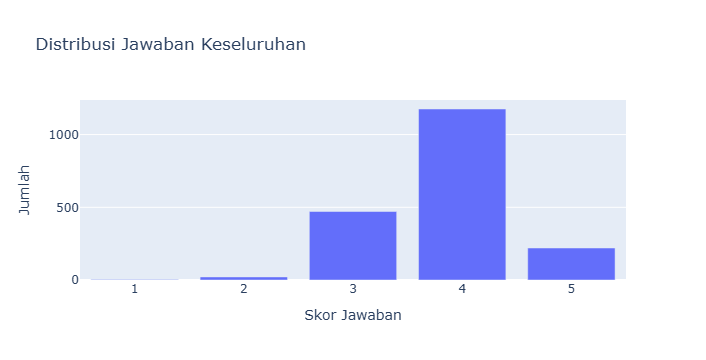

In [7]:
all_values = df_numeric.to_numpy().flatten()

series = pd.to_numeric(pd.Series(all_values), errors='coerce')
series = series.dropna().astype(int)

distribusi = series.value_counts().sort_index()

fig1 = px.bar(
    x=distribusi.index.astype(str),
    y=distribusi.values,
    labels={"x": "Skor Jawaban", "y": "Jumlah"},
    title="Distribusi Jawaban Keseluruhan"
)

fig1.show()


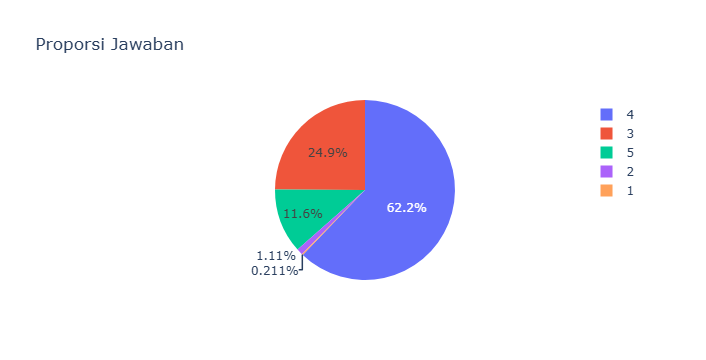

In [8]:
fig2 = px.pie(
    values=distribusi.values,
    names=distribusi.index.astype(str),
    title="Proporsi Jawaban"
)

fig2.show()


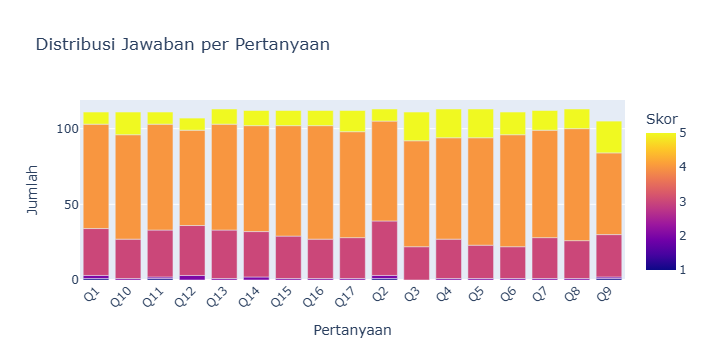

In [9]:
df_melt = df_numeric.melt(
    var_name="Pertanyaan",
    value_name="Skor"
)

df_melt = df_melt.dropna()
df_melt["Skor"] = df_melt["Skor"].astype(int)

distribusi_per_pertanyaan = (
    df_melt.groupby(["Pertanyaan", "Skor"])
    .size()
    .reset_index(name="Jumlah")
)

fig3 = px.bar(
    distribusi_per_pertanyaan,
    x="Pertanyaan",
    y="Jumlah",
    color="Skor",
    barmode="stack",
    title="Distribusi Jawaban per Pertanyaan"
)

fig3.update_layout(xaxis_tickangle=-45)

fig3.show()


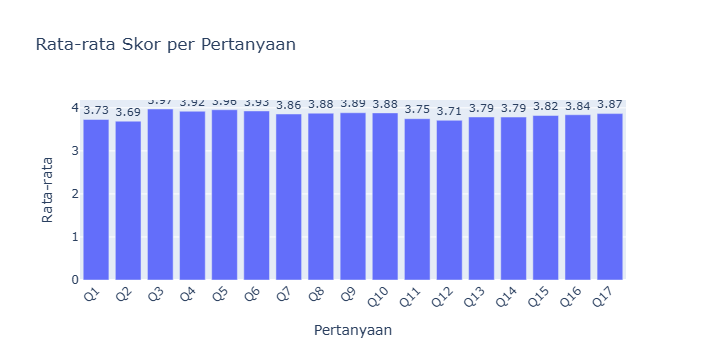

In [10]:
rata_rata = df_numeric.mean().reset_index()
rata_rata.columns = ["Pertanyaan", "Rata-rata"]

fig4 = px.bar(
    rata_rata,
    x="Pertanyaan",
    y="Rata-rata",
    text="Rata-rata",
    title="Rata-rata Skor per Pertanyaan"
)

fig4.update_traces(
    texttemplate="%{text:.2f}",
    textposition="outside"
)

fig4.update_layout(xaxis_tickangle=-45)

fig4.show()


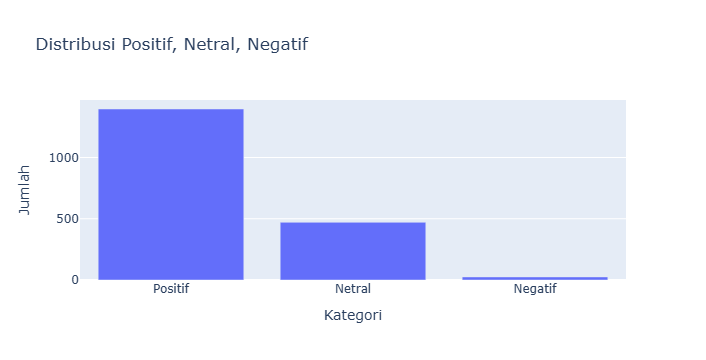

In [11]:
def kategori(skor):
    if skor >= 4:
        return "Positif"
    elif skor == 3:
        return "Netral"
    else:
        return "Negatif"

kategori_series = series.apply(kategori)
kategori_count = kategori_series.value_counts()

fig5 = px.bar(
    x=kategori_count.index,
    y=kategori_count.values,
    labels={"x": "Kategori", "y": "Jumlah"},
    title="Distribusi Positif, Netral, Negatif"
)

fig5.show()
